In [24]:
import math
import torch
import numpy as np
import matplotlib.pyplot as plt

In [64]:
P = 500
n_data = 200
n_features = 300
sig = 0.1
alpha = 1.

X = torch.randn(n_data, P)*(alpha**2)
w = torch.tensor(np.random.choice([i for i in range(1, 3)], n_features, replace=True)).float()

In [65]:
y = X[:, :n_features].matmul(w) + torch.randn(n_data)*(sig**2)

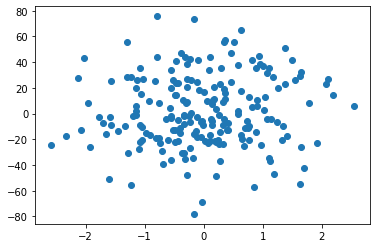

In [66]:
plt.scatter(X[:, 0], y)

### Posterior Distribution

In [67]:
def get_post_cov(phi, sig, alpha):
    in_term = phi.t().matmul(phi).div(sig**2) + alpha**(-1) * torch.eye(phi.shape[1])
    return in_term.inverse()

In [68]:
post_cov = get_post_cov(X, sig, alpha)

In [69]:
evals, evecs = np.linalg.eig(post_cov)

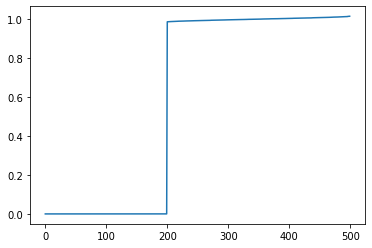

In [70]:
plt.plot(np.sort(np.real(evals)))